<a href="https://colab.research.google.com/github/suhashj/Machine-Learning-projects/blob/main/Loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank_loan_status_prediction

In [ ]:
import pandas as pd

train_df = pd.read_csv('credit_train.csv')
print(train_df.shape)

(100514, 19)


In [ ]:
train_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
train_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
#for categorical data
train_df.describe(include=['O'])

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,100000,100000,100000,100000,95778,100000,100000
unique,81999,81999,2,2,11,4,16
top,a9669128-6441-45e0-8dbc-4ee63f03cc67,ed650cff-ae5a-4e37-bdfc-d4cc14f9fd9b,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,2,2,77361,72208,31121,48410,78552


This is the same process where we want to select the attributes with specific dtypes.

Ex: train.select_dtypes(include = ['int64']) This gives you a filtered dataframe where the dataframe is entirely NUMERIC dedicated.

Similarly, when you perform train_df.dscribe(include = ['O']) it pulls out the objects dtypes attributes and shows their count/frequency/max/quartiles.

In [ ]:
train_df.select_dtypes(include=['float64']) 

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,NaN,NaN,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,NaN,NaN,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df.shape

(100514, 19)

In [ ]:
train_df=train_df.dropna(thresh=9) #This will search along the column and check if the column has atleast 9 non-NaN values


In [ ]:
train_df.shape

(100000, 19)

In [ ]:
train_df.duplicated().sum()

10215

In [ ]:
train_df.drop_duplicates(inplace=True)

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
train_df.shape

(89785, 19)

In [ ]:
# let's check unique values
columns=train_df.columns
for col in columns:
    print(col,':\n',train_df[col].unique())
    print(train_df[col].value_counts())
    print('\n',20*'****','\n')

Loan ID :
 ['14dd8831-6af5-400b-83ec-68e61888a048'
 '4771cc26-131a-45db-b5aa-537ea4ba5342'
 '4eed4e6a-aa2f-4c91-8651-ce984ee8fb26' ...
 'e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7'
 '81ab928b-d1a5-4523-9a3c-271ebb01b4fb'
 'c63916c6-6d46-47a9-949a-51d09af4414f']
34542706-dcb1-4def-9626-205af62aa960    2
3248b1bf-78ae-41ef-85dc-99a66e5f7cd0    2
ed3de3ac-5e54-4fae-bbc7-39cd0ecffab5    2
4ca32f19-5335-4384-9b67-ffdc27ebd06d    2
2c50cc10-39e2-4d6f-9825-177a012d8dc0    2
                                       ..
c3f45539-ec14-4310-86da-6e8c6e5bebf9    1
b019bd0c-4a89-4cd7-bb77-660c56d53851    1
723be860-7af2-4949-9f71-4d39234a54eb    1
df9652ea-10c0-4b61-b17c-aef1afbd4b9a    1
a9669128-6441-45e0-8dbc-4ee63f03cc67    1
Name: Loan ID, Length: 81999, dtype: int64

 ******************************************************************************** 

Customer ID :
 ['981165ec-3274-42f5-a3b4-d104041a9ca9'
 '2de017a3-2e01-49cb-a581-08169e83be29'
 '5efb2b2b-bf11-4dfd-a572-3761a2694725' ...
 '2ced5f10-bd60

In [ ]:
df = train_df.copy()

In [ ]:
df['Loan ID'].value_counts()

34542706-dcb1-4def-9626-205af62aa960    2
3248b1bf-78ae-41ef-85dc-99a66e5f7cd0    2
ed3de3ac-5e54-4fae-bbc7-39cd0ecffab5    2
4ca32f19-5335-4384-9b67-ffdc27ebd06d    2
2c50cc10-39e2-4d6f-9825-177a012d8dc0    2
                                       ..
c3f45539-ec14-4310-86da-6e8c6e5bebf9    1
b019bd0c-4a89-4cd7-bb77-660c56d53851    1
723be860-7af2-4949-9f71-4d39234a54eb    1
df9652ea-10c0-4b61-b17c-aef1afbd4b9a    1
a9669128-6441-45e0-8dbc-4ee63f03cc67    1
Name: Loan ID, Length: 81999, dtype: int64

In [ ]:
df[df['Loan ID'].duplicated()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.0,Short Term,717.0,1765290.0,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.7,NaN,16.0,1.0,446329.0,891022.0,1.0,0.0
2020,4ada45a7-1323-4961-a8b4-45bf1c473bab,117496d1-3c6e-4299-a8f6-0e4668b6bef9,Fully Paid,301114.0,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,5948.71,9.0,NaN,10.0,1.0,59888.0,372746.0,1.0,0.0
2268,35e2f286-1c14-4892-8ddf-cd9c397f84a4,75b6f4dd-b3c6-4220-969f-54c372c22e1f,Fully Paid,65714.0,Short Term,721.0,662074.0,4 years,Rent,Other,1704.87,14.9,50.0,3.0,0.0,33250.0,120340.0,0.0,0.0
2680,3b990bb6-440c-43ee-9ef1-4e303b5447dd,8ce9f4e4-0044-4779-a4c5-66552927d0ab,Fully Paid,270556.0,Short Term,NaN,NaN,10+ years,Own Home,Home Improvements,24095.61,23.5,70.0,7.0,0.0,286387.0,908490.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,94eaa3d9-2b9f-467b-855f-9e8f5eae57a4,4dba3a9b-1a39-4464-88df-c7f8735944d1,Fully Paid,431860.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.5,25.0,5.0,0.0,241319.0,476806.0,0.0,0.0
99979,2e7e2e3b-db0b-418d-aae8-33991bb2a503,52aa2f3b-3385-42fe-8aaa-57abace6d762,Fully Paid,766392.0,Short Term,717.0,1891070.0,7 years,Home Mortgage,Debt Consolidation,41130.82,15.4,NaN,20.0,1.0,604485.0,969430.0,1.0,0.0
99985,3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,Fully Paid,179454.0,Short Term,708.0,1356068.0,4 years,Home Mortgage,Debt Consolidation,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.0,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0


In [ ]:
df[df['Loan ID']=='32200a7e-c65e-4e5e-9878-1161d256bcfe']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
180,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,234806.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0


In [ ]:
mis_val = df.isnull().sum()
mis_val

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             3802
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48337
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      190
Tax Liens                           9
dtype: int64

In [ ]:
len(df)

89785

In [ ]:
mis_val_percent=100*df.isnull().sum()/len(df)
mis_val_percent

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    21.333185
Annual Income                   21.333185
Years in current job             4.234560
Home Ownership                   0.000000
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    53.836387
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.002228
Bankruptcies                     0.211617
Tax Liens                        0.010024
dtype: float64

In [ ]:
 mis_val_table=pd.concat([mis_val, mis_val_percent],axis=1)

In [ ]:
mis_val_table

,0,1
Loan ID,0,0.000000
Customer ID,0,0.000000
Loan Status,0,0.000000
Current Loan Amount,0,0.000000
Term,0,0.000000
Credit Score,19154,21.333185
Annual Income,19154,21.333185
Years in current job,3802,4.234560
Home Ownership,0,0.000000
Purpose,0,0.000000


In [ ]:
mis_val_table=mis_val_table.rename(
        columns={0:'Missing Values',1:'% of Total Values'})

In [ ]:
mis_val_table

,Missing Values,% of Total Values
Loan ID,0,0.000000
Customer ID,0,0.000000
Loan Status,0,0.000000
Current Loan Amount,0,0.000000
Term,0,0.000000
Credit Score,19154,21.333185
Annual Income,19154,21.333185
Years in current job,3802,4.234560
Home Ownership,0,0.000000
Purpose,0,0.000000


# we clearly see column 'Months since last delinquent' has more than 50% missing values

In [ ]:
df = df.drop(columns='Months since last delinquent',axis=1)

In [ ]:
df.shape

(89785, 18)

# As the number of missing values is so low in the 'Tax Liens' , 'Bankruptcies' and 'Maximum Open Credit' so we will drop them

In [ ]:
df.dropna(subset=["Maximum Open Credit"],inplace=True)

df.dropna(subset=["Tax Liens"],inplace=True)

df.dropna(subset=["Bankruptcies"],inplace=True)

In [ ]:
df.shape

(89593, 18)

In [ ]:
mis_val=df.isnull().sum()
mis_val

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19111
Annual Income                19111
Years in current job          3802
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

In [ ]:
mis_val_percent=100*df.isnull().sum()/len(df)
mis_val_percent

Loan ID                       0.000000
Customer ID                   0.000000
Loan Status                   0.000000
Current Loan Amount           0.000000
Term                          0.000000
Credit Score                 21.330908
Annual Income                21.330908
Years in current job          4.243635
Home Ownership                0.000000
Purpose                       0.000000
Monthly Debt                  0.000000
Years of Credit History       0.000000
Number of Open Accounts       0.000000
Number of Credit Problems     0.000000
Current Credit Balance        0.000000
Maximum Open Credit           0.000000
Bankruptcies                  0.000000
Tax Liens                     0.000000
dtype: float64

In [ ]:
mis_val_table=pd.concat([mis_val, mis_val_percent],axis=1)

In [ ]:
mis_val_table

,0,1
Loan ID,0,0.000000
Customer ID,0,0.000000
Loan Status,0,0.000000
Current Loan Amount,0,0.000000
Term,0,0.000000
Credit Score,19111,21.330908
Annual Income,19111,21.330908
Years in current job,3802,4.243635
Home Ownership,0,0.000000
Purpose,0,0.000000


In [ ]:
mis_val_table=mis_val_table.rename(
        columns = {0:'Missing Values',1:'% of Total Values'})

In [ ]:
mis_val_table

,Missing Values,% of Total Values
Loan ID,0,0.000000
Customer ID,0,0.000000
Loan Status,0,0.000000
Current Loan Amount,0,0.000000
Term,0,0.000000
Credit Score,19111,21.330908
Annual Income,19111,21.330908
Years in current job,3802,4.243635
Home Ownership,0,0.000000
Purpose,0,0.000000


In [ ]:
col=df.columns.str.replace(' ','_')
df.columns=col

In [ ]:
df

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


# Years_in_current_job

In [ ]:
df['Years_in_current_job'].value_counts()

10+ years    27726
2 years       8227
3 years       7321
< 1 year      7317
5 years       6128
1 year        5808
4 years       5500
6 years       5125
7 years       4986
8 years       4110
9 years       3543
Name: Years_in_current_job, dtype: int64

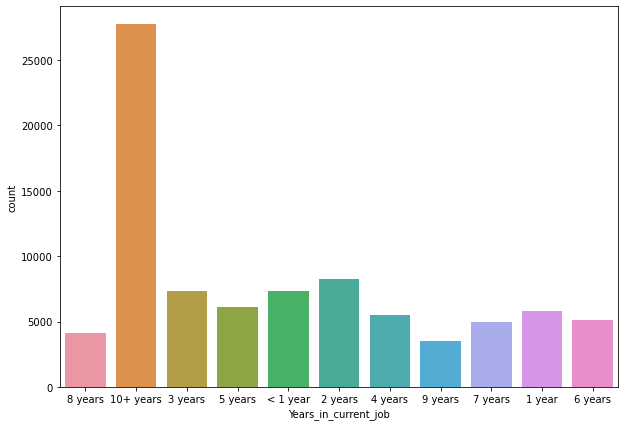

In [ ]:
# 'Years in current job' see its distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,7))
sns.countplot(df['Years_in_current_job'])

In [ ]:
import numpy as np
df['Years_in_current_job'].replace('',np.nan,inplace=True)

In [ ]:
df['Years_in_current_job'].isnull().sum()

3802

In [ ]:
# let's fill with mode value 
df['Years_in_current_job']=df['Years_in_current_job'].fillna(df['Years_in_current_job'].mode()[0])

In [ ]:
df['Years_in_current_job'].isna().sum()

0

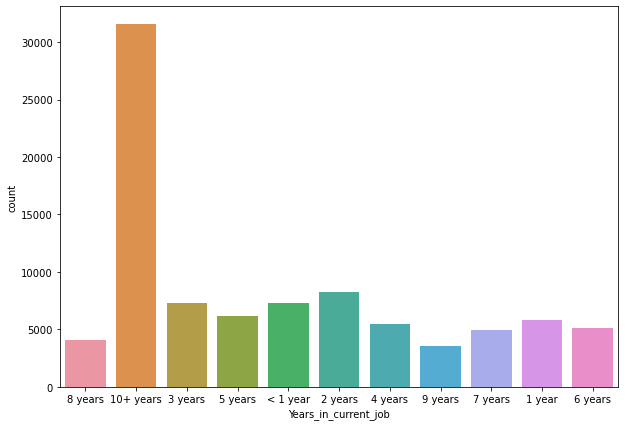

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(df['Years_in_current_job'])

https://docs.python.org/3/library/re.html

\d
For Unicode (str) patterns:
Matches any Unicode decimal digit (that is, any character in Unicode character category [Nd]). This includes [0-9], and also many other digit characters. If the ASCII flag is used only [0-9] is matched.

For 8-bit (bytes) patterns:
Matches any decimal digit; this is equivalent to [0-9].

In [ ]:
# let's do some cleaning to this column
df['Years_in_current_job']=df['Years_in_current_job'].str.extract(r"(\d+)") # using reg.exp to capture one or more digits
df['Years_in_current_job'] =df['Years_in_current_job'].astype(float)

In [ ]:
df['Years_in_current_job'].value_counts()

10.0    31528
1.0     13125
2.0      8227
3.0      7321
5.0      6128
4.0      5500
6.0      5125
7.0      4986
8.0      4110
9.0      3543
Name: Years_in_current_job, dtype: int64

In [ ]:
mis_val=df.isnull().sum()
mis_val

Loan_ID                          0
Customer_ID                      0
Loan_Status                      0
Current_Loan_Amount              0
Term                             0
Credit_Score                 19111
Annual_Income                19111
Years_in_current_job             0
Home_Ownership                   0
Purpose                          0
Monthly_Debt                     0
Years_of_Credit_History          0
Number_of_Open_Accounts          0
Number_of_Credit_Problems        0
Current_Credit_Balance           0
Maximum_Open_Credit              0
Bankruptcies                     0
Tax_Liens                        0
dtype: int64

In [ ]:
mis_val_percent=100*df.isnull().sum()/len(df)
mis_val_percent

Loan_ID                       0.000000
Customer_ID                   0.000000
Loan_Status                   0.000000
Current_Loan_Amount           0.000000
Term                          0.000000
Credit_Score                 21.330908
Annual_Income                21.330908
Years_in_current_job          0.000000
Home_Ownership                0.000000
Purpose                       0.000000
Monthly_Debt                  0.000000
Years_of_Credit_History       0.000000
Number_of_Open_Accounts       0.000000
Number_of_Credit_Problems     0.000000
Current_Credit_Balance        0.000000
Maximum_Open_Credit           0.000000
Bankruptcies                  0.000000
Tax_Liens                     0.000000
dtype: float64

In [ ]:
mis_val_table=pd.concat([mis_val, mis_val_percent],axis=1)

In [ ]:
mis_val_table

,0,1
Loan_ID,0,0.000000
Customer_ID,0,0.000000
Loan_Status,0,0.000000
Current_Loan_Amount,0,0.000000
Term,0,0.000000
Credit_Score,19111,21.330908
Annual_Income,19111,21.330908
Years_in_current_job,0,0.000000
Home_Ownership,0,0.000000
Purpose,0,0.000000


# Credit_score

In [ ]:
credict=df[df['Credit_Score']>851]
credict.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10.0,Rent,Debt Consolidation,5777.90,14.8,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10.0,Rent,Debt Consolidation,14207.63,17.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4.0,Rent,major_purchase,10135.36,11.4,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6.0,Home Mortgage,Debt Consolidation,22632.99,19.3,5.0,0.0,474658.0,742720.0,0.0,0.0


In [ ]:
def credit_error(value):
    credit_value=value
    credit_value['Credit_Score']=np.where(value['Credit_Score']>851,value['Credit_Score'].values/10,value['Credit_Score'])
    return credit_value

In [ ]:
data=credit_error(df)
data

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1.0,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:
data.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,8.959300e+04,70482.000000,7.048200e+04,89593.000000,89593.000000,89593.000000,89593.000000,89593.000000,8.959300e+04,8.959300e+04,89593.000000,89593.000000
mean,1.305835e+07,718.565591,1.375957e+06,6.137544,18411.806653,18.242999,11.125735,0.165247,2.940685e+05,7.720317e+05,0.115534,0.028663
std,3.329246e+07,28.133343,1.104330e+06,3.519618,12142.347469,7.034235,4.996396,0.478399,3.720957e+05,8.766674e+06,0.347922,0.255365
min,1.542200e+04,585.000000,7.662700e+04,1.000000,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.803340e+05,706.000000,8.481600e+05,3.000000,10176.970000,13.500000,8.000000,0.000000,1.130310e+05,2.771340e+05,0.000000,0.000000
50%,3.140940e+05,725.000000,1.169773e+06,6.000000,16149.810000,17.000000,10.000000,0.000000,2.098550e+05,4.726700e+05,0.000000,0.000000
75%,5.326420e+05,740.000000,1.648915e+06,10.000000,23932.400000,21.700000,14.000000,0.000000,3.676880e+05,7.913620e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,10.000000,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
data.shape

(89593, 18)

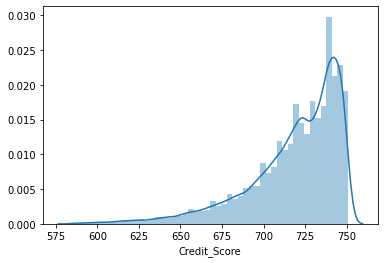

In [ ]:
sns.distplot(data['Credit_Score'])

In [ ]:
# let's fill with median
data['Credit_Score'].fillna(data['Credit_Score'].median(),inplace= True)

# Annual_Income

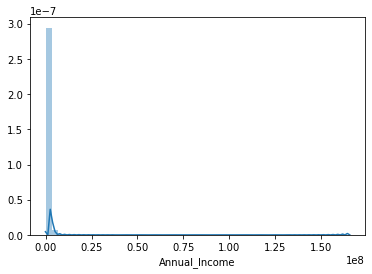

In [ ]:
sns.distplot(data['Annual_Income'])

In [ ]:
#let's fill with median
data['Annual_Income'].fillna(data['Annual_Income'].median(),inplace= True)

# so we will move forward by dropping some unwanted columns, we are dropping Loan ID, Customer ID, these are categorical data and they actually have no effect on the data,

In [ ]:
data.drop(columns=['Loan_ID','Customer_ID'],axis=1,inplace=True )

In [ ]:
data.head(10)

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,725.0,1169773.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,725.0,1169773.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
5,Charged Off,206602.0,Short Term,729.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
7,Charged Off,648714.0,Long Term,725.0,1169773.0,1.0,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2.0,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
9,Fully Paid,215952.0,Short Term,739.0,1454735.0,1.0,Rent,Debt Consolidation,39277.75,13.9,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [ ]:
data.shape

(89593, 16)

# Visualising Categorical features

In [ ]:
cat_data=data.select_dtypes(exclude=np.number)
cat_data

,Loan_Status,Term,Home_Ownership,Purpose
0,Fully Paid,Short Term,Home Mortgage,Home Improvements
1,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
2,Fully Paid,Short Term,Own Home,Debt Consolidation
3,Fully Paid,Long Term,Own Home,Debt Consolidation
4,Fully Paid,Short Term,Rent,Debt Consolidation
...,...,...,...,...
99994,Fully Paid,Short Term,Home Mortgage,Other
99996,Fully Paid,Short Term,Rent,Debt Consolidation
99997,Fully Paid,Short Term,Rent,Debt Consolidation
99998,Fully Paid,Short Term,Rent,Debt Consolidation


# Purpose

In [ ]:
data['Purpose'].value_counts()

Debt Consolidation      70724
Home Improvements        5226
other                    5210
Other                    2874
Business Loan            1352
Buy a Car                1160
Medical Bills             980
Buy House                 582
Take a Trip               487
major_purchase            330
small_business            249
moving                    135
wedding                   102
vacation                   89
Educational Expenses       85
renewable_energy            8
Name: Purpose, dtype: int64

# we notice 'other' duplicated in different spelling

In [ ]:
data.Purpose=data.Purpose.str.replace('other','Other')
data['Purpose'].value_counts()

Debt Consolidation      70724
Other                    8084
Home Improvements        5226
Business Loan            1352
Buy a Car                1160
Medical Bills             980
Buy House                 582
Take a Trip               487
major_purchase            330
small_business            249
moving                    135
wedding                   102
vacation                   89
Educational Expenses       85
renewable_energy            8
Name: Purpose, dtype: int64

# Home_Ownership

In [ ]:
data['Home_Ownership'].value_counts()

Home Mortgage    43479
Rent             37750
Own Home          8182
HaveMortgage       182
Name: Home_Ownership, dtype: int64

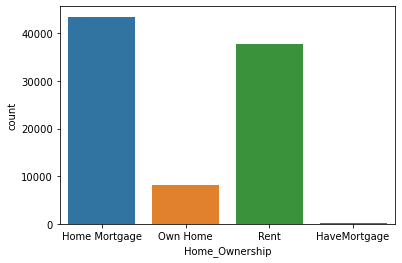

In [ ]:
sns.countplot(data['Home_Ownership'])

# Visualising Numerical features

In [ ]:
data.select_dtypes(include=np.number)

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,445412.0,709.0,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,725.0,1169773.0,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,741.0,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,725.0,1169773.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,210584.0,719.0,783389.0,1.0,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99996,99999999.0,732.0,1289416.0,1.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,103136.0,742.0,1150545.0,6.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,530332.0,746.0,1717524.0,9.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


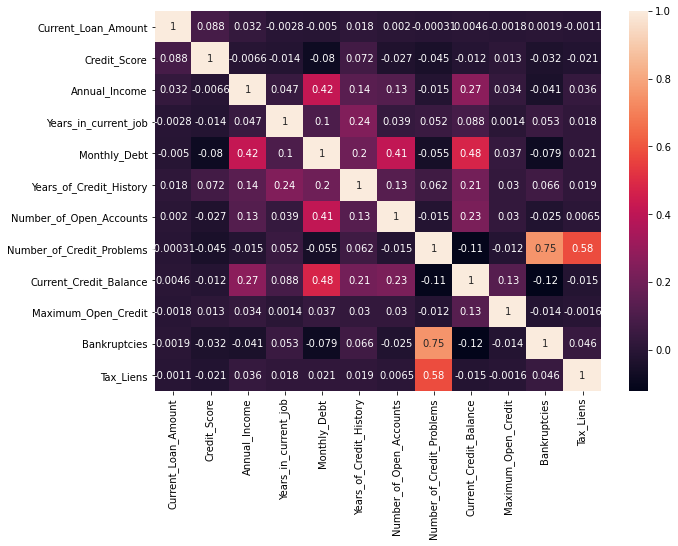

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

# some observations:
     Bankruptcy has a high correlation with number_of_credit_problems.
     Tax_liens also have a high correlation with number_of_credit_problems.
     Monthly_debt has a high correlation with both, current_credit_balance, annual_income and number_of_open_accounts.

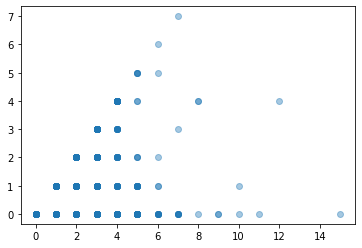

In [ ]:
plt.scatter(x='Number_of_Credit_Problems',y='Bankruptcies',data=data,alpha=0.4)

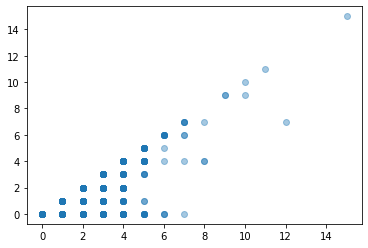

In [ ]:
plt.scatter(x='Number_of_Credit_Problems',y='Tax_Liens',data= data,alpha=0.4)

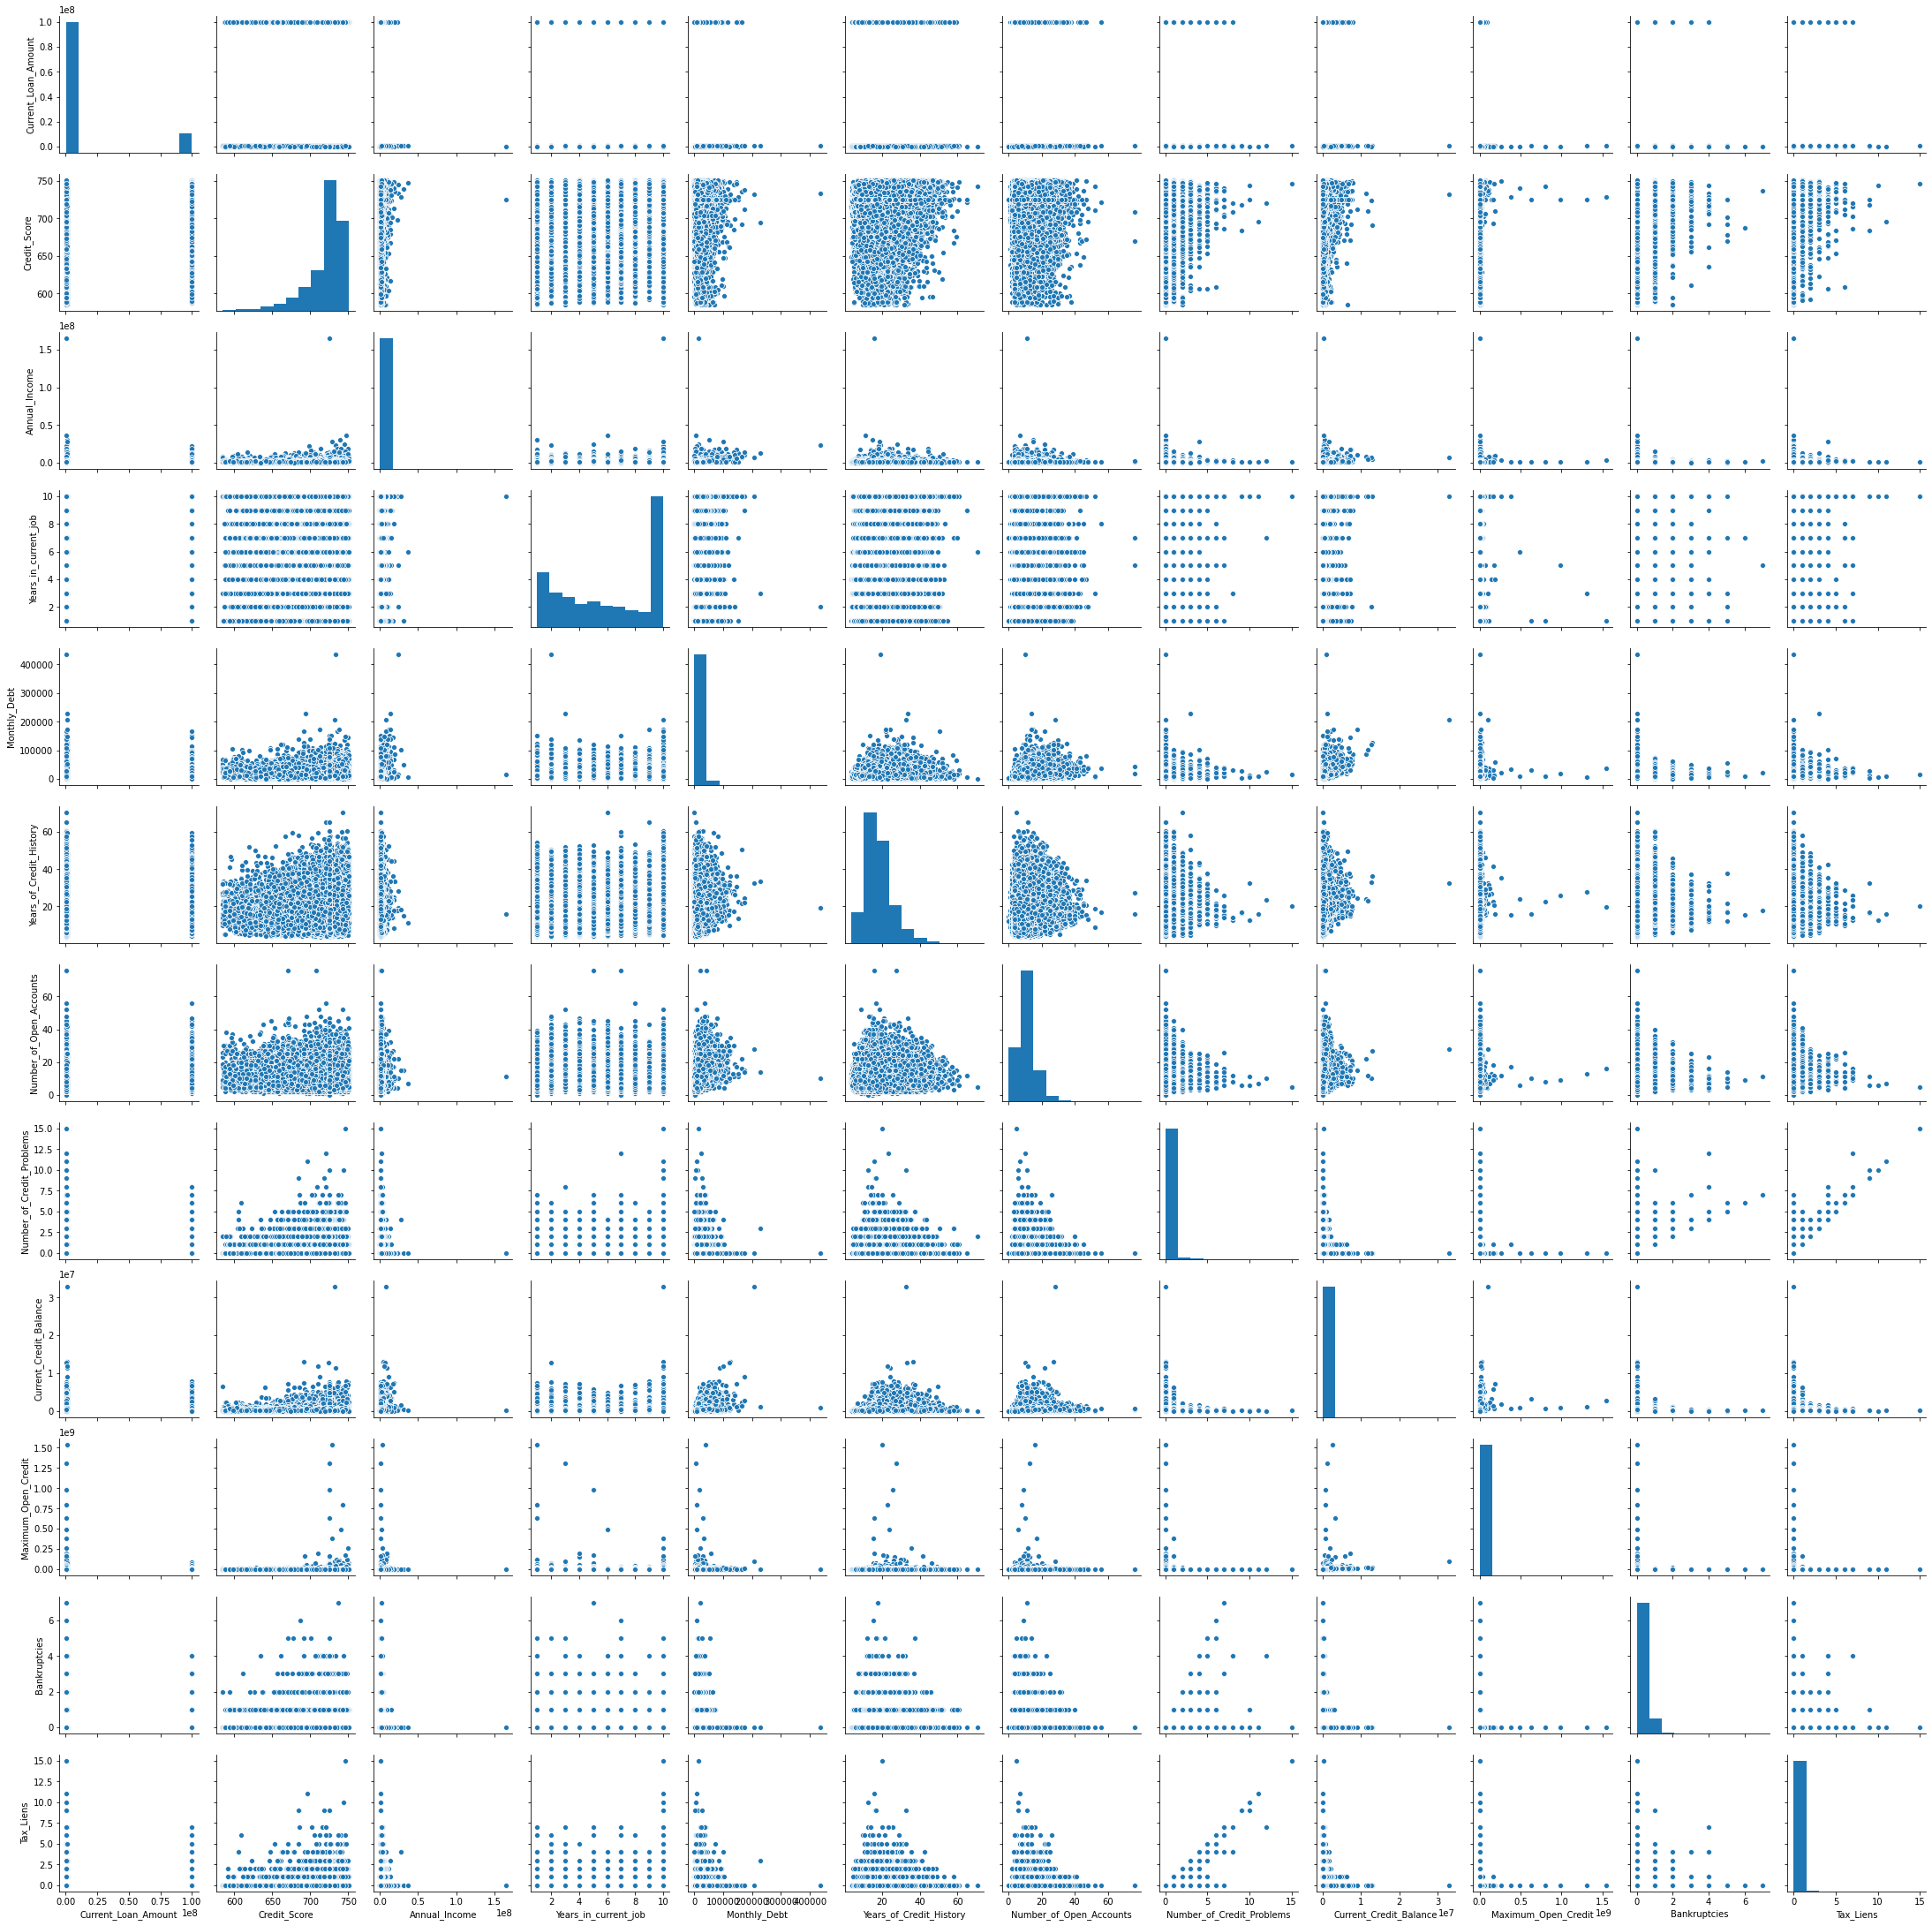

In [ ]:
sns.pairplot(data)

In [ ]:
#categorical data
cat_data=['Loan_Status','Term','Home_Ownership','Purpose']

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for col in cat_data:
    data[col]=le.fit_transform(data[col])
    print(le.classes_)

['Charged Off' 'Fully Paid']
['Long Term' 'Short Term']
['HaveMortgage' 'Home Mortgage' 'Own Home' 'Rent']
['Business Loan' 'Buy House' 'Buy a Car' 'Debt Consolidation'
 'Educational Expenses' 'Home Improvements' 'Medical Bills' 'Other'
 'Take a Trip' 'major_purchase' 'moving' 'renewable_energy'
 'small_business' 'vacation' 'wedding']


In [ ]:
data.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,445412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,725.0,1169773.0,10.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8.0,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,725.0,1169773.0,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
data.shape

(89593, 16)

In [ ]:
data.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,445412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,725.0,1169773.0,10.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8.0,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,725.0,1169773.0,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


# Spliting data to x and y

In [ ]:
x=df.drop(['Loan_Status'],axis=1).values
y=df['Loan_Status'].values

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state= 42)

In [ ]:
print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test:  {y_test.shape}')

X_train: (71674, 15)
X_test:  (17919, 15)
y_train: (71674,)
y_test:  (17919,)


# Scaling data

In [ ]:
from sklearn.preprocessing import RobustScaler

# Robust scaler reduces the effect of ouliers
ro_scaler=RobustScaler()
x_train=ro_scaler.fit_transform(X_train)
x_test=ro_scaler.fit_transform(X_test)

# Logistic regression

In [ ]:
from sklearn.metrics import f1_score,r2_score

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7485699137762648
0.7502650817567945


In [ ]:
y_pred=lr.predict(x_test)
data_lr=pd.DataFrame({"Y_test":y_test,"Y_pred":y_pred})
data_lr

,Y_test,Y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
17914,0,1
17915,1,1
17916,1,1
17917,1,1


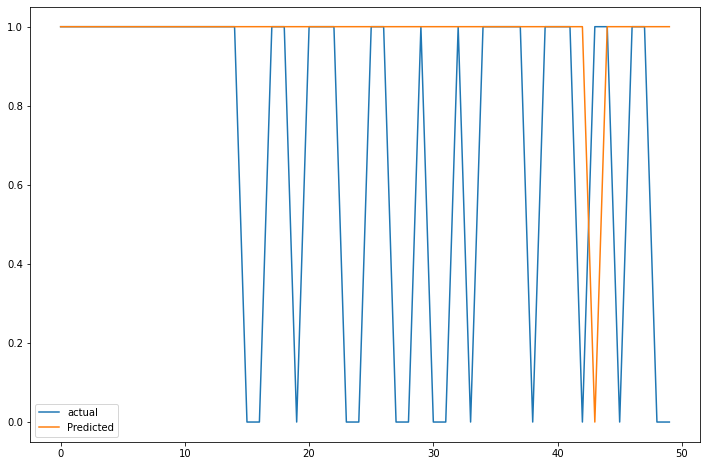

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(data_lr[:50])
plt.legend(['actual','Predicted'])

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors = K Number
knn.fit(x_train , y_train )
print(knn.score(x_train , y_train))
print(knn.score(x_test , y_test))

0.8335379635572174
0.6968580835984151


In [ ]:
y_pred1 = knn.predict(x_test)
data1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred1})
data1.head(10)

,Y_test,Y_pred
0,1,0
1,1,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


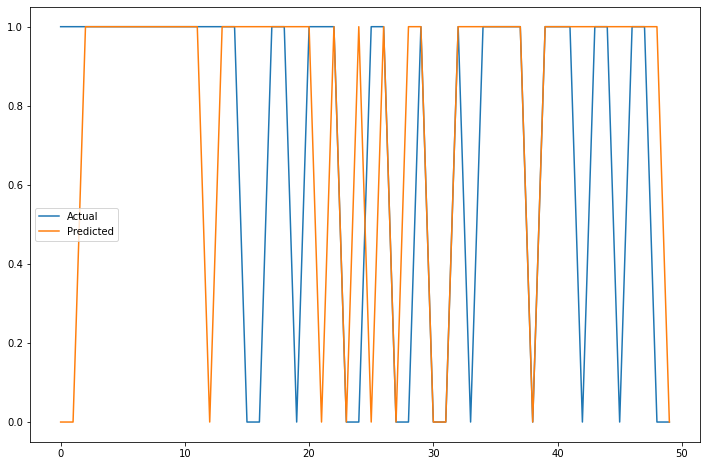

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(data1[:50])
plt.legend([ 'Actual' ,'Predicted'])

# Decision Tree Classifier

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_features=6,max_depth=4)
dt.fit(x_train , y_train)
print(dt.score(x_train , y_train))
print(dt.score(x_test , y_test))

0.7472584200686442
0.7503208884424354


In [ ]:
y_pred2 = dt.predict(x_test)
data2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred2})
data2.head(10)

,Y_test,Y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


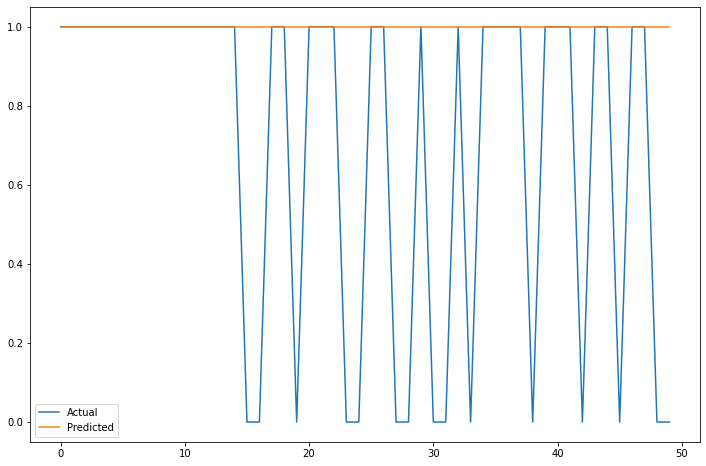

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(data2[:50])
plt.legend([ 'Actual' ,'Predicted'])

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50 , max_features=5 , max_depth=6)
rf.fit(x_train , y_train)
print(rf.score(x_train , y_train))
print(rf.score(x_test , y_test))

0.7478723107402964
0.7503766951280764


In [ ]:
y_pred3 = rf.predict(x_test)
data3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred3})
data3.head(10)

,Y_test,Y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
f1=f1_score(y_test,y_pred)
f1

0.8556777501854419

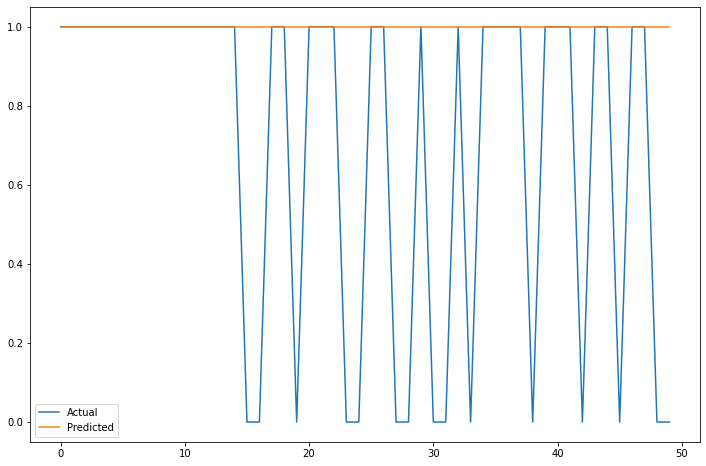

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(data3[:50])
plt.legend([ 'Actual' ,'Predicted'])